In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [21]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [22]:
data.drop('Urban',axis=1,inplace=True)

In [23]:
data.drop('Undergrad',axis=1,inplace=True)

In [24]:
data

,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,Single,68833,50047,10
1,Divorced,33700,134075,18
2,Married,36925,160205,30
3,Single,50190,193264,15
4,Married,81002,27533,28
...,...,...,...,...
595,Divorced,76340,39492,7
596,Divorced,69967,55369,2
597,Divorced,47334,154058,0
598,Married,98592,180083,17


In [25]:
data.isnull().sum()

Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Marital.Status   600 non-null    object
 1   Taxable.Income   600 non-null    int64 
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 18.9+ KB


In [30]:
data.duplicated().any()

False

In [32]:
data.size

2400

In [33]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<Axes: >

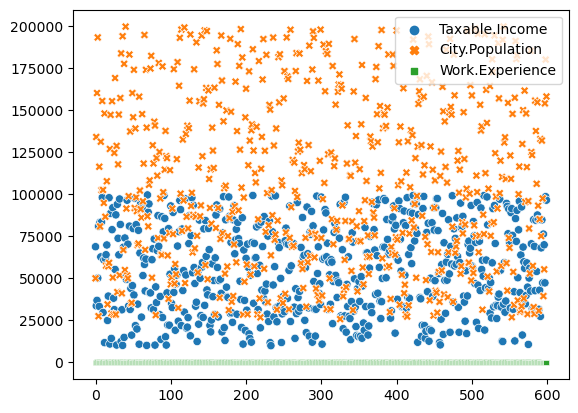

In [34]:
sns.scatterplot(data)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


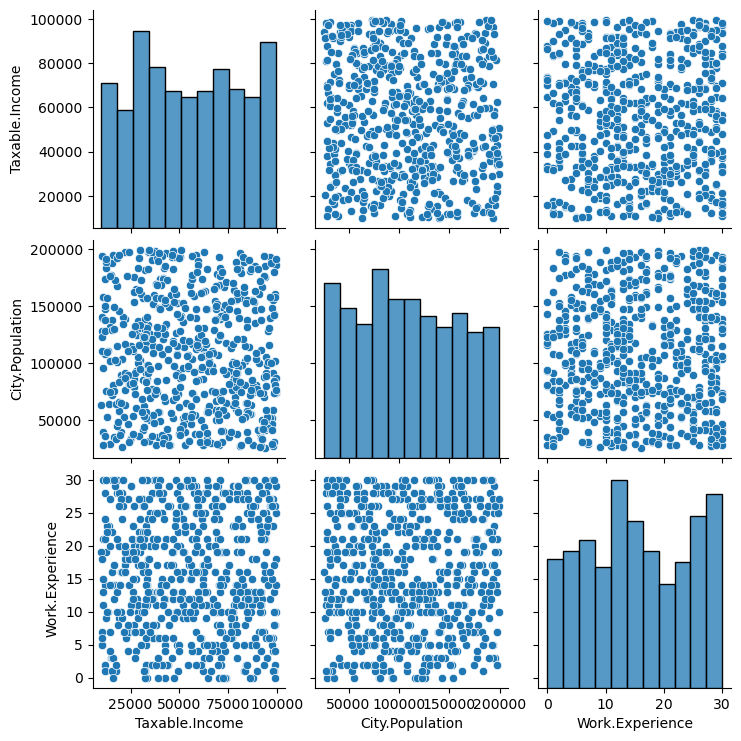

In [47]:
sns.pairplot(data)

array([[<Axes: title={'center': 'Taxable.Income'}>]], dtype=object)

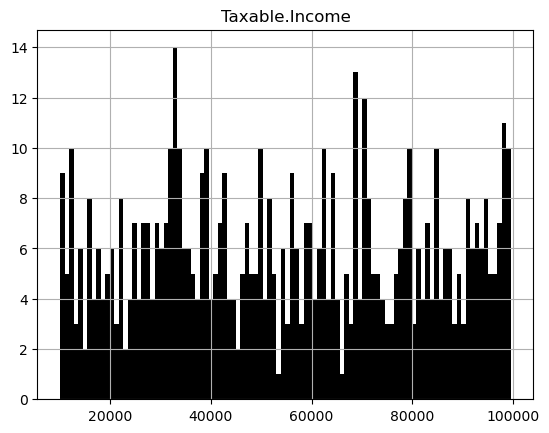

In [35]:
data.hist('Taxable.Income',bins=100,color='black')

In [36]:
target=data[['Taxable.Income']]
target

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [37]:
features=data.drop('Taxable.Income',axis=1)
features

,Marital.Status,City.Population,Work.Experience
0,Single,50047,10
1,Divorced,134075,18
2,Married,160205,30
3,Single,193264,15
4,Married,27533,28
...,...,...,...
595,Divorced,39492,7
596,Divorced,55369,2
597,Divorced,154058,0
598,Married,180083,17


In [38]:
features=pd.get_dummies(features)
features

,City.Population,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,50047,10,0,0,1
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,0,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,0
596,55369,2,1,0,0
597,154058,0,1,0,0
598,180083,17,0,1,0


In [39]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(450, 5)
(450, 1)
(150, 5)
(150, 1)


In [41]:
decc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)

In [42]:
decc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
y_pred=decc.predict(x_test)
y_pred

array([11865, 12470, 10150, 10163, 11865, 11865, 10150, 12470, 10933,
       10003, 10870, 10870, 10150, 12470, 10003, 10003, 10348, 10933,
       10163, 10870, 12470, 10150, 11865, 12470, 10163, 11865, 11865,
       12470, 10150, 10933, 10003, 10348, 10348, 10933, 11865, 10870,
       10348, 10870, 10003, 10150, 10348, 12470, 11865, 11865, 10933,
       10933, 10348, 11865, 11865, 12470, 10163, 10163, 10163, 11865,
       10150, 10150, 12470, 10870, 11865, 11865, 10163, 10933, 11865,
       10933, 10150, 10870, 11865, 10348, 10348, 10163, 10163, 10163,
       10150, 11865, 10348, 10150, 10870, 11865, 12470, 10163, 10150,
       10003, 12470, 10933, 10348, 12470, 10933, 11865, 11865, 12470,
       10348, 11865, 12470, 10348, 10150, 10933, 12470, 12470, 11865,
       10003, 10348, 10163, 10348, 10150, 10933, 10163, 12470, 10870,
       10163, 10348, 10150, 10003, 10933, 10003, 10870, 12470, 11865,
       12470, 10003, 10870, 10163, 12470, 12470, 10870, 10933, 10163,
       11865, 10870,

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       10003       0.00      0.00      0.00       0.0
       10150       0.00      0.00      0.00       0.0
       10163       0.00      0.00      0.00       0.0
       10348       0.00      0.00      0.00       0.0
       10735       0.00      0.00      0.00       1.0
       10870       0.00      0.00      0.00       0.0
       10900       0.00      0.00      0.00       1.0
       10933       0.00      0.00      0.00       0.0
       10987       0.00      0.00      0.00       1.0
       11865       0.00      0.00      0.00       0.0
       12072       0.00      0.00      0.00       1.0
       12083       0.00      0.00      0.00       1.0
       12470       0.00      0.00      0.00       0.0
       12810       0.00      0.00      0.00       1.0
       16264       0.00      0.00      0.00       1.0
       17440       0.00      0.00      0.00       1.0
       18032       0.00      0.00      0.00       1.0
       19169       0.00    

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\

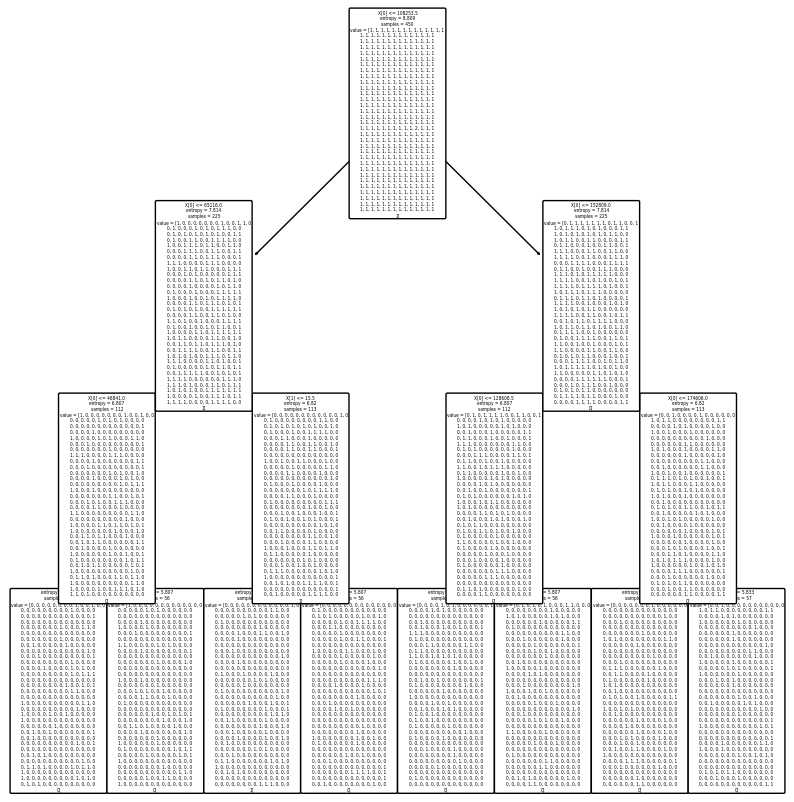

In [45]:
plt.figure(figsize=(10,10))
plot_tree(decc,rounded=True,filled=True,feature_names=features.columns.name,class_names=target.columns.name);